## Project Submission
## Student: Arthur DeGraw
# Project Statement
How do I Complete this Project?

This project is connected with the Introduction to Data Analysis course, but depending on your background knowledge, you may not need to take the whole class to complete this project.
Introduction

For the final project, you will conduct your own data analysis and create a file to share that documents your findings. You should start by taking a look at your dataset and brainstorming what questions you could answer using it. Then you should use Pandas and NumPy to answer the questions you are most interested in, and create a report sharing the answers. You will not be required to use statistics or machine learning to complete this project, but you should make it clear in your communications that your findings are tentative. This project is open-ended in that we are not looking for one right answer.
Step One - Choose Your Data Set

Choose one of the following datasets to analyze for your project:

    Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.

    Baseball Data - A data set containing complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. This dataset contains many files, but you can choose to analyze only the one(s) you are most interested in.

    Choose the comma-delimited version, which contains CSV files.

Step Two - Get Organized

Eventually you’ll want to submit your project (and share it with friends, family, and employers). Get organized before you begin. We recommend creating a single folder that will eventually contain:

    The report communicating your findings
    Any Python code you wrote as part of your analysis
    The data set you used (which you will not need to submit)

You may wish to use Jupyter notebook, in which case you can submit both the code you wrote and the report of your findings in the same document. Otherwise, you will need to submit your report and code separately.
Step Three - Analyze Your Data

Brainstorm some questions you could answer using the data set you chose, then start answering those questions. Here are some ideas to get you started:

    Titanic Data
        What factors made people more likely to survive?
    Baseball Data
        What is the relationship between different performance metrics? Do any have a strong negative or positive relationship?
        What are the characteristics of baseball players with the highest salaries?

Try and suggest questions that promote looking at relationships between multiple variables. You should aim to analyze at least one dependent variable and three independent variables in your investigation. Make sure you use NumPy and Pandas where they are appropriate!
Step Four - Share Your Findings

Once you have finished analyzing the data, create a report that shares the findings you found most interesting. You might wish to use Jupyter notebook to share your findings alongside the code you used to perform the analysis, but you can also use another tool if you wish. If you do use a Jupyter notebook, make sure that your report text is contained in Markdown cells to clearly distinguish your comments and findings from your code work.
Step Five - Review

Use the Project Rubric to review your project. If you are happy with your submission, then you're ready to submit your project. If you see room for improvement, keep working to improve your project.


# Project Submission
## Step One

I have previously investigated the Titanic dataset as part of the Kaggle.com competition.  Therefore I have chosen to investigate the baseball datasets.  

## Step Two
Before I decide what packages and datasets to load it would be useful to state a few questions that will be investigated.  As a former professional cyclist, where doping regulations are quite comprehensive, I have wanted to investigate the potential doping of the Bonds, McGwire, Sosa era homerun race.  So a few questions I have are:

1. How have the number of homeruns changed over the course of time?
2. Are there any external factors that could have influenced changes in number of homeruns hit by the homerun leader?
3. Are the records of McGwire and Bonds that unusual?  Possibly when compared to their historical homerun numbers or the other homerun leaders?

## Importing libraries and setting some useful global variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
from copy import copy
import numpy as np
plt.rcParams["figure.figsize"] = [10,8]
plt.rcParams["font.size"] = 16

In [2]:
batting = pd.read_csv("Batting.csv")

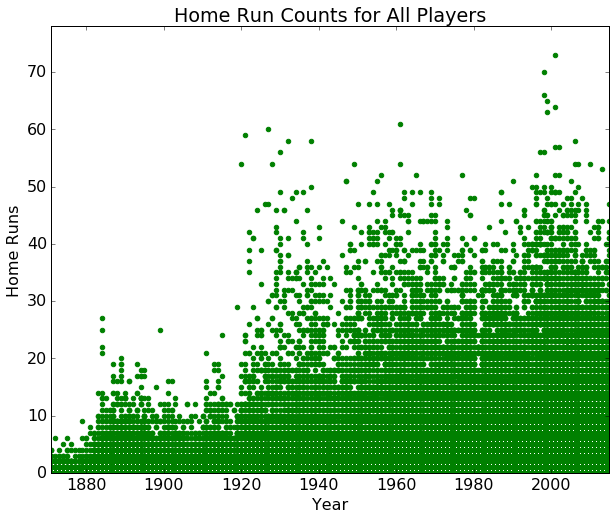

In [3]:
plt.scatter(batting['yearID'], batting['HR'], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Home Runs')
plt.title('Home Run Counts for All Players')
plt.xlim((1871, 2015))
plt.ylim((0,78))
plt.show()

## Too many data points using all players.  Instead try a histogram.

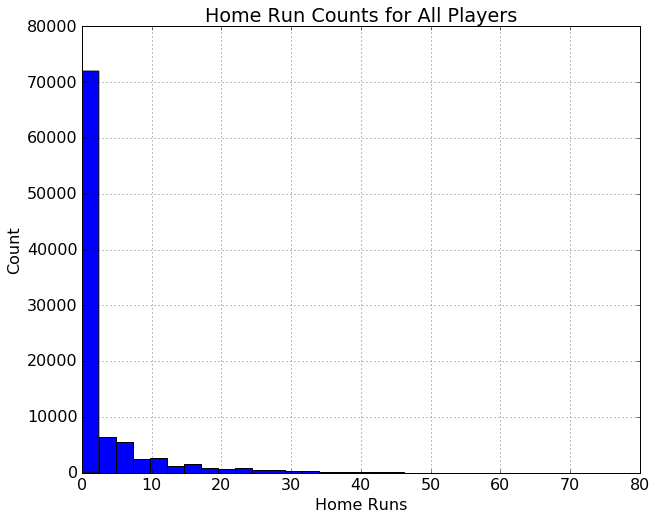

In [5]:
batting['HR'].hist(bins=30)#, bins=100)
plt.xlabel('Home Runs')
plt.ylabel('Count')
plt.title('Home Run Counts for All Players')
plt.show()

In [6]:
idx = batting.groupby(['yearID'])['HR'].transform(max) ==batting['HR']

In [7]:
max_hr = copy(batting[idx])

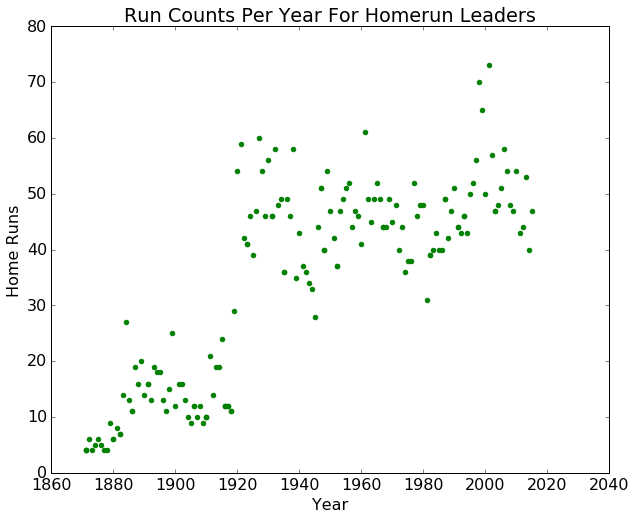

In [8]:
plt.scatter(max_hr['yearID'], max_hr['HR'], marker='o', color=['green'])
plt.xlabel('Year')
plt.ylabel('Home Runs')
plt.title('Run Counts Per Year For Homerun Leaders')
plt.show()

## The number of homeruns hit by the year's homerun leader is very different before/after 1919. Could this be due to number of games played or number of at bats and/or some other set of factors?

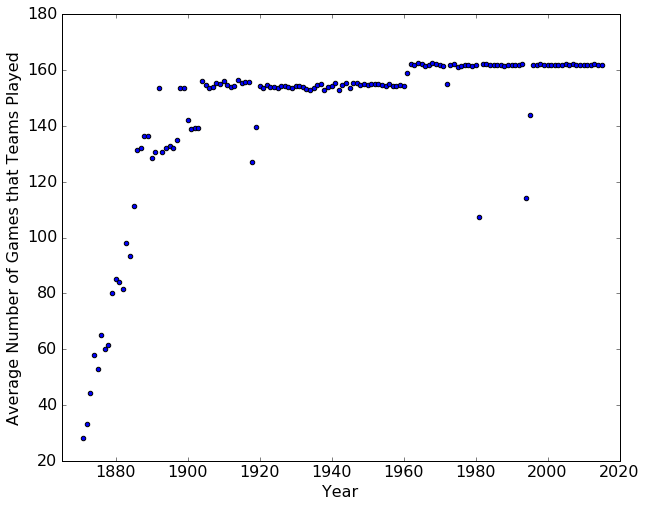

In [9]:

#print(plt.rcParams.keys())
teams = pd.read_csv("Teams.csv")
teams_gb_year = teams.groupby(by='yearID')
plt.scatter(range(1871,2016), np.array(teams_gb_year['G'].mean()))
plt.xlim(1865,2020)
plt.xlabel("Year")
plt.ylabel("Average Number of Games that Teams Played")
plt.show()

## The average number of games played by the teams in a given year has been relatively consistent between 1900 and 1960 and then again between about 1960 and 2015.  The few unusual points could be due to WWI and in the late 1900's a baseball strike.

In [10]:
appearances = pd.read_csv("Appearances.csv")

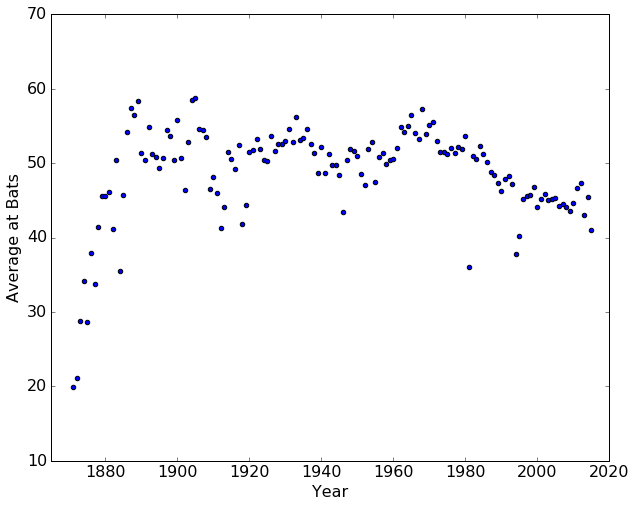

In [11]:
appearances_gb_year = appearances.groupby(by='yearID')
plt.scatter(range(1871,2016), np.array(appearances_gb_year['G_batting'].mean()))
plt.xlabel('Year')
plt.ylabel('Average at Bats')
plt.xlim((1865, 2020))
plt.show()

# Average number of at bats has varied over the years. 
Since an at bat is a chance to hit a homerun, then a better measure than simple count at how good a player is at hitting homeruns might be a home run to at bat, HR/AB, ratio.

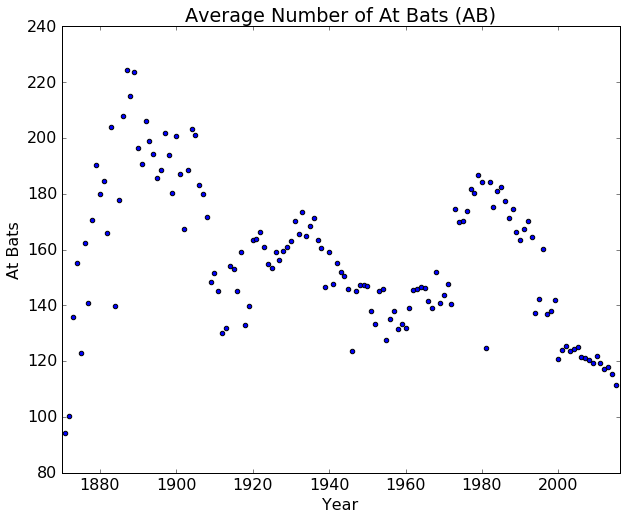

In [14]:
batting_gb_year = batting.groupby(by='yearID')

plt.scatter(range(1871, 2016), np.array(batting_gb_year['AB'].mean()))
plt.xlim((1870, 2016))
plt.xlabel('Year')
plt.ylabel('At Bats')
plt.title('Average Number of At Bats (AB)')
plt.show()

## Since the "AB" vary so much, this definitely could affect the homerun leader's number of homeruns.  To correct for this variation, I will instead consider the ration of HR/AB

In [15]:
max_hr['HR_per_AB'] = max_hr['HR'] / max_hr['AB']

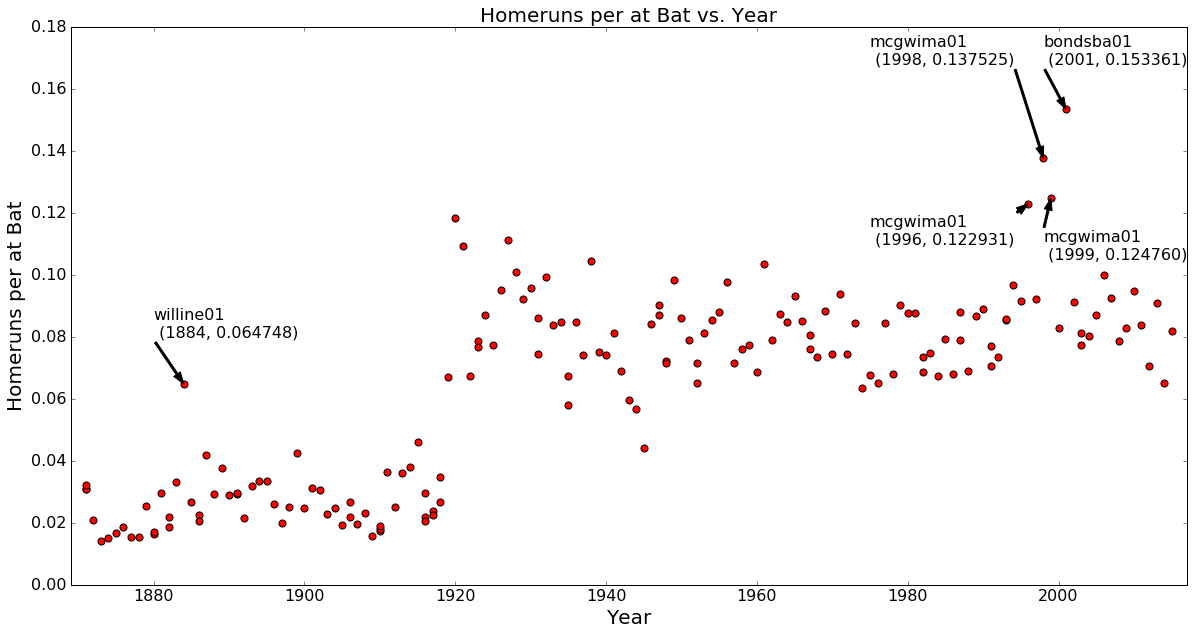

In [16]:
fig=plt.figure(figsize=(20,10))
plt.scatter(max_hr['yearID'], max_hr['HR_per_AB'], marker='o', c='red', s=50)
plt.annotate('willine01\n (1884, 0.064748)', xy=(1884, 0.064748), xytext=(1880, .08),fontsize=16,
            arrowprops=dict(facecolor='black', width=2, headwidth=8),
            )
plt.annotate('mcgwima01\n (1996, 0.122931)', xy=(1996, .122931), xytext=(1975, .11), fontsize=16,
            arrowprops=dict(facecolor='black', width=2, headwidth=8),
            )
plt.annotate('mcgwima01\n (1998, 0.137525)', xy=(1998, 0.137525), xytext=(1975, .168), fontsize=16,
            arrowprops=dict(facecolor='black', width=2, headwidth=8),
            )
plt.annotate('mcgwima01\n (1999, 0.124760)', xy=(1999, 0.124760), xytext=(1998, .105), fontsize=16,
            arrowprops=dict(facecolor='black', width=2, headwidth=8),
            )
plt.annotate('bondsba01\n (2001, 0.153361)', xy=(2001, 0.153361), xytext=(1998, .168), fontsize=16,
            arrowprops=dict(facecolor='black', width=2, headwidth=8),
            )
plt.xlabel('Year', fontsize=20)
plt.ylabel('Homeruns per at Bat', fontsize=20)
plt.xlim(max_hr['yearID'].min()-2, max_hr['yearID'].max() + 2)
plt.title('Homeruns per at Bat vs. Year', fontsize=20)

plt.show()

## Clearly there is a distinct difference in the data before and after 1919  year.   
Upon further investigation there were a series of rules that may have lead to this change.  The spitball was made illegal, cork balls were introduced, and a homerun distance was given a minimum.  These changes all happened between 1910 and 1925.  

The points labelled in the above scatterplot are definitely worth further investigation.  I will compare them to a broader set of HR/AB ratios and to each player's own historical ratios.

## Since there are two populations here: before and after 1919 the distributions are quite different.  So we will not include the pre 1919 data when considering how unusual the Bonds, McGwire points are.

In [17]:
early_yrs = max_hr[max_hr['yearID']<=1919]
later_yrs = max_hr[max_hr['yearID']>1919]

## Taking a look at a simple box plot between the before/after 1919 data for the max home run hitter.  Clearly there is a distinction and the Sosa, McGuire, Bonds era are definitly outliers among the post 1919 data using this metric of player performance.

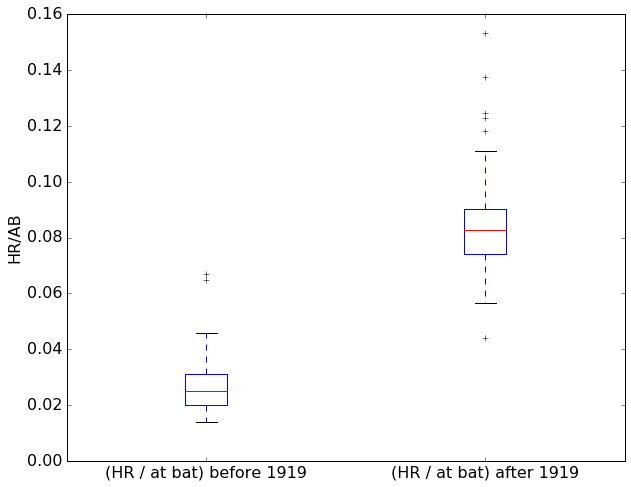

In [19]:
plt.figure()
plot = plt.boxplot([early_yrs['HR_per_AB'], later_yrs['HR_per_AB']], 0, showcaps=True, showfliers=True, labels = ['(HR / at bat) before 1919', '(HR / at bat) after 1919'])
plt.ylabel('HR/AB')
plt.show()

## As an aside, now going to obtain a data summary for later years, standardize, and see how many standard deviations the Barry Bonds point is from the mean.

In [20]:
later_yrs['HR_per_AB'].describe()

count    108.000000
mean       0.083557
std        0.015818
min        0.044025
25%        0.073963
50%        0.082764
75%        0.090236
max        0.153361
Name: HR_per_AB, dtype: float64

In [21]:
early_yrs['Stdized HR_per_AB'] = (early_yrs['HR_per_AB'] - early_yrs['HR_per_AB'].mean()) / early_yrs['HR_per_AB'].std()

/home/ajdegraw/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


How far is the outlier point of willine01 from the mean?

In [25]:
early_yrs['Stdized HR_per_AB'].max()

3.8808371010842011

In [26]:
later_yrs['Stdized HR_per_AB_Later'] = (later_yrs['HR_per_AB'] - later_yrs['HR_per_AB'].mean()) / later_yrs['HR_per_AB'].std()

/home/ajdegraw/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


How far is the bondsba01 outlier point from the mean?

In [27]:
later_yrs['Stdized HR_per_AB_Later'].max()

4.4130327792681152

## The above value shows that the max HR/AB ratio of Barry Bonds in 2001 was 4.41 standard deviations above the mean, very rare.  So lets look a little closer at Bonds, McGwire data over the years.

In [26]:
mcguire = copy(batting[batting['playerID'] == 'mcgwima01'])
mcguire['HR_per_AB'] = mcguire['HR'] / mcguire['AB']
bonds = copy(batting[batting['playerID']=='bondsba01'])
bonds['HR_per_AB'] = bonds['HR'] / bonds['AB']
#print(bonds['HR_per_AB'])

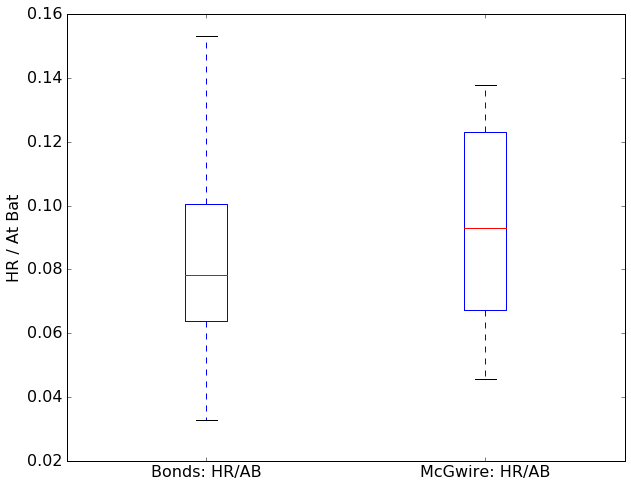

In [27]:
plt.boxplot([bonds['HR_per_AB'], mcguire['HR_per_AB']], showcaps=True, showfliers=True, labels=['Bonds: HR/AB', 'McGwire: HR/AB'])
plt.ylabel("HR / At Bat")
plt.show()

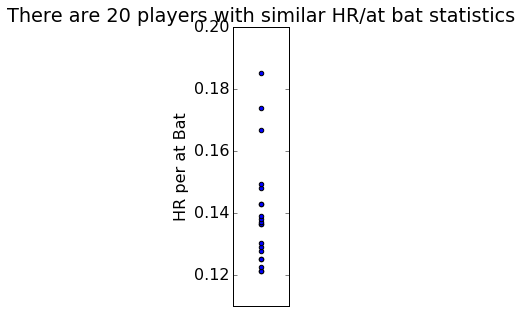

playerID
hornsa01     0.121212
hillgl01     0.121212
parkeja03    0.122449
ashlebi01    0.125000
deerro01     0.125000
teagata01    0.127660
greenmi01    0.129032
mcgwima01    0.130295
fickro01     0.136364
johnsda06    0.136364
bondsba01    0.137002
estalbo02    0.137931
drewjd01     0.138889
kottage01    0.142857
willite01    0.142857
laneja01     0.148148
spencsh01    0.149254
kingmda01    0.166667
huntebr01    0.173913
hessmmi01    0.185185
Name: HR_per_AB, dtype: float64


In [32]:
#Comparison of career avg HR/AB to other players - are there players that are just as unusual in this metric?
batting['HR_per_AB'] = batting['HR'] / batting['AB']
hr_ab = batting[(batting['HR_per_AB'] > 0.12 ) & (batting['HR_per_AB'] < 1) & (batting['AB'] > 20) & (batting['yearID'] > 1920)]
hr_ab_gb_player = hr_ab.groupby(by = 'playerID')['HR_per_AB'].mean()
hr_ab_gb_player.sort_values(ascending=True, inplace=True)
                     
hr_ab_gb_player_array = np.array(hr_ab_gb_player)
fig=plt.figure(figsize=(1,5))
plt.scatter(np.ones(len(hr_ab_gb_player_array)), hr_ab_gb_player_array)
plt.xticks([],[])
plt.title("There are {} players with similar HR/at bat statistics".format(len(hr_ab_gb_player_array)))
plt.ylabel("HR per at Bat")
plt.show()

print(hr_ab_gb_player)

Bonds and McGwire are present on this list of players with high career HR/AB ratios but they are not at the top of the list with the highest values.

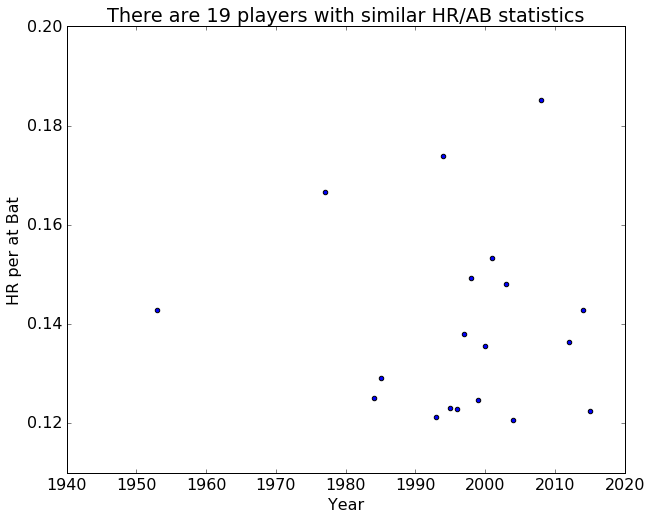

In [34]:
#Comparison to highest HR/AB for each year.
#batting['HR_per_AB'] = batting['HR'] / batting['AB']
hr_ab = batting[(batting['HR_per_AB'] > 0.12 ) & (batting['HR_per_AB'] < 1) & (batting['AB'] > 20) & (batting['yearID'] > 1920)]
hr_ab_gb_player = hr_ab.groupby(by = 'yearID')['HR_per_AB'].max()
hr_ab_gb_player.sort_values(ascending=True, inplace=True)
hr_ab_gb_player_array = np.array(hr_ab_gb_player)

plt.scatter(hr_ab_gb_player.keys(), hr_ab_gb_player_array)
plt.title("There are {} players with similar HR/AB statistics".format(len(hr_ab_gb_player_array)))
plt.ylabel("HR per at Bat")
plt.xlabel("Year")
plt.show()

Note that some player's HR/AB is higher than that of Bonds/McGwire in the years that they had high homerun counts.

## Finally, a comparison to their career ratio.

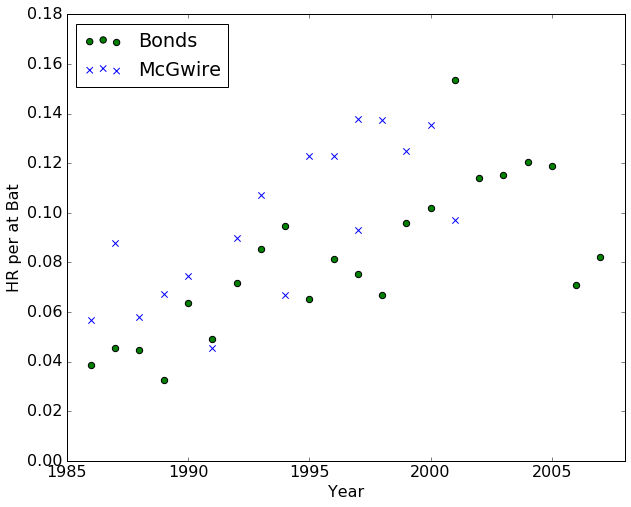

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(bonds['yearID'], bonds['HR_per_AB'], s=40, c='g', marker="o", label='Bonds')
ax1.scatter(mcguire['yearID'], mcguire['HR_per_AB'], s=40, c='b', marker="x", label='McGwire')
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("HR per at Bat")
plt.xlim((1985, 2008))
plt.show()

## Looking at the HR/AB data, their numbers for 1996-2001, apart from Bonds in 2001, do not look that unusual when compared to their history as the boxplots also show.

# Conclusion:
When comparing to other players HR/AB and to their own historical HR/AB values, the Bonds and McGwire data points do not seem that unusual.  The data does appear more unusual when we use instead just HR values.

# References

http://stackoverflow.com/questions/4270301/matplotlib-multiple-datasets-on-the-same-scatter-plot

http://www.baseball-almanac.com/rulechng.shtml

http://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplot-lib-plot